### Pemuatan Library dan Dataset

Pada cell di bawah ini, Proses mengimpor library yang dibutuhkan untuk analisis data dan machine learning, seperti pandas untuk manipulasi data, numpy untuk operasi numerik, serta matplotlib dan seaborn untuk visualisasi data.

Selanjutnya, dataset `heart.csv` yang berisi informasi pasien terkait penyakit jantung dimuat ke dalam DataFrame pandas bernama `df`. Fungsi `df.head()` digunakan untuk menampilkan lima baris pertama dari dataset guna mendapatkan gambaran umum tentang fitur-fitur yang ada dan format datanya.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2]:
df.info()
print("\nMissing values per column:\n", df.isnull().sum())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB

Missing values per column:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngin

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Pemeriksaan Informasi Dasar dan Nilai Hilang


**Hasil Observasi :**
- Dari output `df.info()`, diketahui dataset terdiri dari **918 baris dan 12 kolom**.
- Semua kolom memiliki tipe data yang sesuai (numerik atau objek/string).
- Berdasarkan `df.isnull().sum()`, **tidak ditemukan adanya nilai yang hilang (missing values)** pada setiap kolom dataset. Ini menunjukkan data cukup bersih dari sisi kelengkapan.
- `df.describe()` menunjukkan variasi rentang nilai antar fitur numerik, yang mengindikasikan perlunya penskalaan fitur (feature scaling) di tahap selanjutnya. Misalnya, 'Age' berkisar antara 28-77, sedangkan 'Oldpeak' berkisar antara -2.6 hingga 6.2.

### Melihat Sebaran Data untuk Fitur Angka

Setelah k melihat perbandingan jumlah pasien yang punya penyakit jantung dan yang tidak, sekarang kita ingin tahu lebih banyak tentang fitur-fitur lain yang berupa angka, misalnya usia, tekanan darah, kolesterol, dan lainnya. saya akan membuat gambar (histogram) untuk masing-masing fitur angka ini. Tujuannya adalah untuk melihat bagaimana sebaran nilai-nilai pada setiap fitur tersebut: apakah nilainya banyak yang berkumpul di tengah, atau lebih banyak di angka rendah, atau di angka tinggi. Ini juga bisa membantu kita melihat kalau ada angka-angka yang aneh atau sangat berbeda dari yang lain.

**Apa yang dilakukan:**
-   Mentukan dulu fitur-fitur angka mana saja yang ingin dilihat sebarannya. Dalam hal ini, kita memilih: 'Age' (Usia), 'RestingBP' (Tekanan Darah Istirahat), 'Cholesterol' (Kolesterol), 'MaxHR' (Denyut Jantung Maksimum), dan 'Oldpeak'.
-   Kemudian, saya menggunakan fungsi `.hist()` yang ada di Pandas untuk secara otomatis membuatkan gambar histogram untuk setiap fitur yang sudah kita pilih tadi. Setiap fitur akan punya gambar histogramnya sendiri.

**Mengapa dilakukan:**
-   Histogram ini seperti cermin yang menunjukkan bagaimana data tersebar untuk setiap fitur angka. hal ini dapat membantu mengetahui apakah kebanyakan pasien usianya muda atau tua, tekanan darahnya tinggi atau rendah, dan seterusnya.
-   Ini juga cara mudah untuk melihat kalau-kalau ada nilai yang sangat aneh, misalnya tekanan darah yang terlalu rendah atau kolesterol yang sangat tinggi.
-   Informasi ini bisa berguna nanti. Kalau misalnya ada fitur yang sebarannya sangat miring, atau ada angka-angka aneh, kita mungkin perlu melakukan penyesuaian tertentu sebelum data ini dipakai untuk membuat model prediksi.

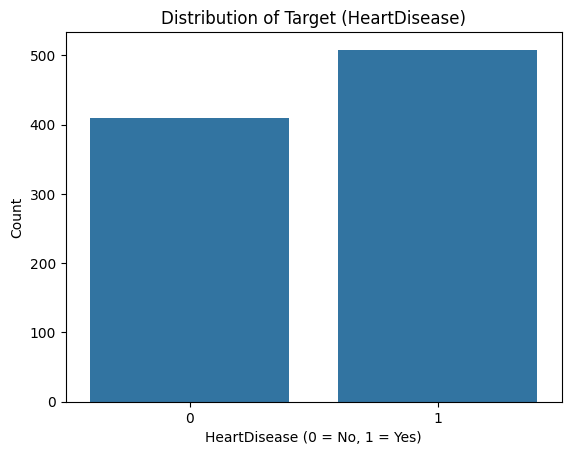

In [3]:
# Visualize target distribution
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribution of Target (HeartDisease)')
plt.xlabel('HeartDisease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

**Hasil Observasi Distribusi Variabel Target:**

- Berdasarkan plot countplot yang dihasilkan, dapat dilihat distribusi jumlah pasien untuk setiap kategori dalam variabel `HeartDisease`.
- Terlihat bahwa terdapat **508 pasien yang terindikasi memiliki penyakit jantung (HeartDisease = 1)** dan **410 pasien yang tidak terindikasi memiliki penyakit jantung (HeartDisease = 0)**. Perbedaan jumlah antara kedua kelas adalah 98.
- Secara visual, dataset ini menunjukkan **sedikit ketidakseimbangan** ke arah kelas positif (HeartDisease = 1), namun perbedaan ini (sekitar 55.3% vs 44.7%) umumnya **tidak dianggap sebagai ketidakseimbangan kelas yang ekstrem**. Oleh karena itu, penanganan khusus seperti *resampling* mungkin tidak langsung diperlukan, tetapi metrik evaluasi yang robust terhadap sedikit ketidakseimbangan (seperti F1-score) akan tetap penting untuk dipertimbangkan saat mengevaluasi model.

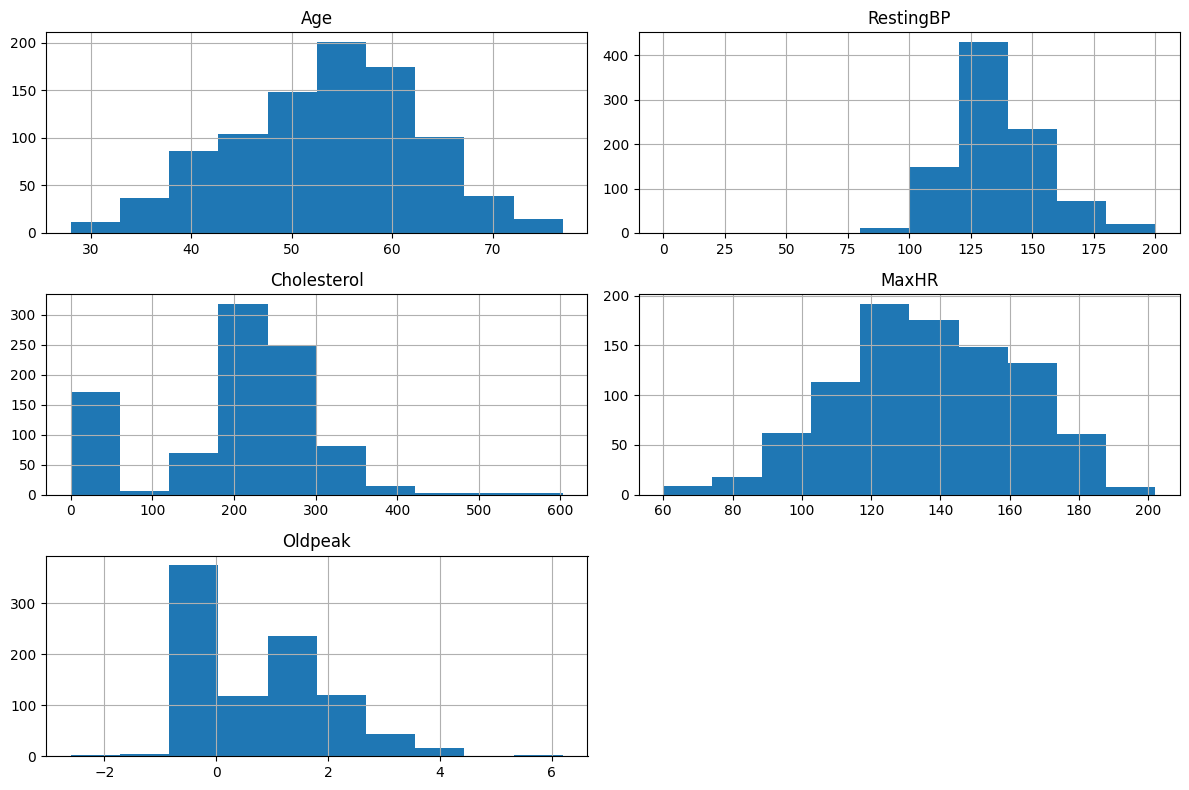

In [4]:
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df[num_cols].hist(figsize=(12,8))
plt.tight_layout()
plt.show()

**Hasil Pengamatan dari Gambar Sebaran Fitur Angka:**

Dari gambar-gambar histogram yang muncul untuk setiap fitur angka:

-   **Age (Usia):** Gambar sebaran usia pasien terlihat cukup seimbang, dengan kebanyakan pasien berada di usia paruh baya hingga lebih tua.
-   **RestingBP (Tekanan Darah Istirahat):** Sebagian besar pasien punya tekanan darah istirahat di sekitar angka 120-140. Tapi, ada juga beberapa data yang menunjukkan angka 0, yang sepertinya aneh untuk tekanan darah orang hidup. Ini perlu kita perhatikan.
-   **Cholesterol (Kolesterol):** Sama seperti tekanan darah, ada juga data kolesterol yang angkanya 0, ini juga aneh dan perlu diperiksa lebih lanjut. Untuk data lainnya, sebaran kolesterol cenderung lebih banyak di angka yang tidak terlalu tinggi, tapi ada juga yang nilainya cukup tinggi.
-   **MaxHR (Denyut Jantung Maksimum):** Sebaran denyut jantung maksimum pasien kelihatannya cukup normal, seperti bentuk lonceng, dengan kebanyakan pasien punya denyut jantung maksimum di sekitar 120-170 kali per menit.
-   **Oldpeak:** Untuk fitur ini, kebanyakan nilainya kecil, dekat dengan 0. Semakin ke kanan (nilai lebih besar), jumlah datanya semakin sedikit. Ini berarti sebarannya miring ke kanan.

**Conclusion**
-   Kita menemukan ada angka 0 yang aneh pada data `RestingBP` dan `Cholesterol`. Ini penting untuk diingat karena angka yang tidak masuk akal ini bisa mengganggu model prediksi kita nanti. Kita perlu memutuskan apa yang akan dilakukan dengan data ini (misalnya, diperbaiki atau mungkin dihapus jika memang salah).
-   Beberapa fitur seperti `Cholesterol` dan `Oldpeak` punya sebaran data yang agak miring. Ini juga perlu jadi catatan, karena kadang model komputer lebih suka data yang sebarannya lebih normal.

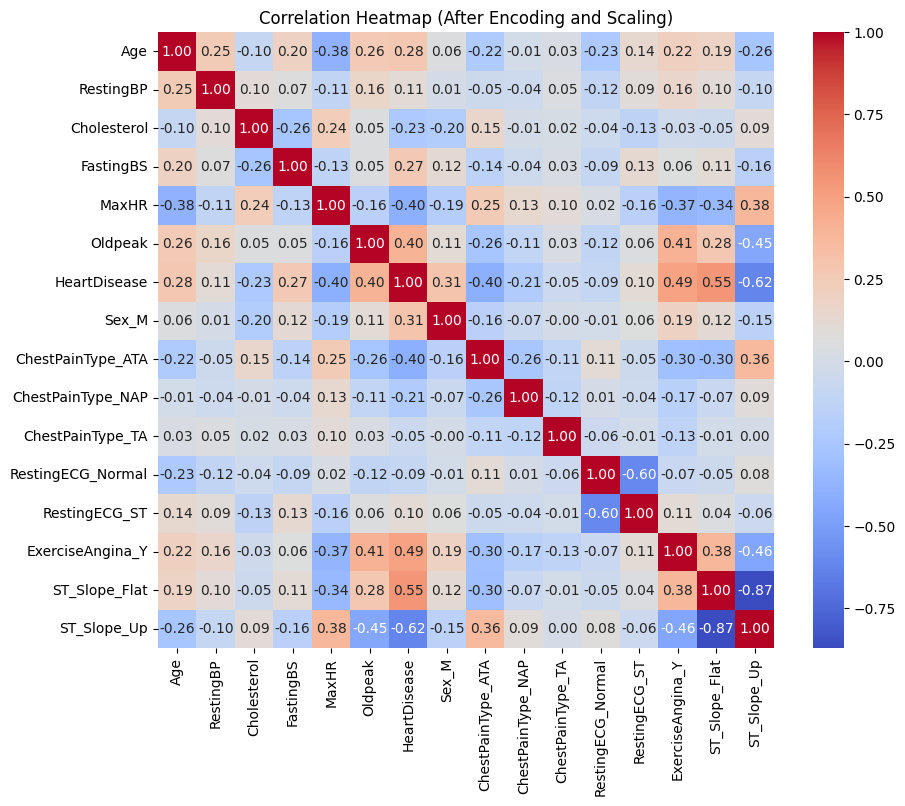

In [ ]:
# Correlation heatmap - Moved after encoding and scaling
plt.figure(figsize=(10, 8))
# Use the encoded DataFrame for correlation calculation
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap (After Encoding and Scaling)')
plt.show()

# Encoding

Beberapa fitur di data seperti 'Jenis Kelamin' atau 'Tipe Nyeri Dada', bentuknya bukan angka tapi kategori (teks). Oleh karena itu, kita perlu mengubahnya menjadi angka. Proses ini disebut *encoding*, dan menggunakan metode *One-Hot Encoding*.

**Apa yang dilakukan:**
-  Menggunakan fungsi `pd.get_dummies()` dari Pandas pada fitur-fitur kategori: 'Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', dan 'ST_Slope'.
-   Setiap kategori dalam fitur tersebut diubah menjadi kolom baru yang isinya 0 atau 1. Opsi `drop_first=True` digunakan untuk membuat data lebih efisien.
-   Hasilnya disimpan dalam tabel baru `df_encoded`.

**Mengapa dilakukan:**
-   Agar semua data siap digunakan oleh model komputer.
-   *One-Hot Encoding* mengubah data kategori menjadi angka tanpa membuat komputer salah mengartikan adanya urutan antar kategori.

In [5]:
df_encoded = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


**Hasil Pengamatan Setelah Encoding:**
-   Kolom-kolom yang tadinya berisi teks (misalnya 'Sex' dengan 'M' atau 'F') di tabel `df_encoded` kini telah berubah menjadi kolom-kolom baru berisi angka 0 atau 1.
-   Jumlah total kolom di tabel data menjadi lebih banyak.

# *Scaling*

Fitur-fitur angka di data kita (seperti 'Usia', 'Kolesterol') punya rentang nilai yang berbeda-beda. Perlu menyamakan skala angka-angka ini agar model optimal.

Apa yang dilakukan:

Memakai StandardScaler dari scikit-learn untuk fitur-fitur angka: 'Age', 'RestingBP', 'Cholesterol', 'MaxHR', dan 'Oldpeak'.
Proses ini mengubah nilai di setiap fitur tersebut sehingga rata-ratanya jadi sekitar 0 dan sebaran datanya (standar deviasi) jadi sekitar 1.
Kemudian membuat gambar histogram lagi untuk fitur-fitur yang baru saja disamakan skalanya ini, untuk melihat bagaimana tampilan sebaran datanya sekarang.


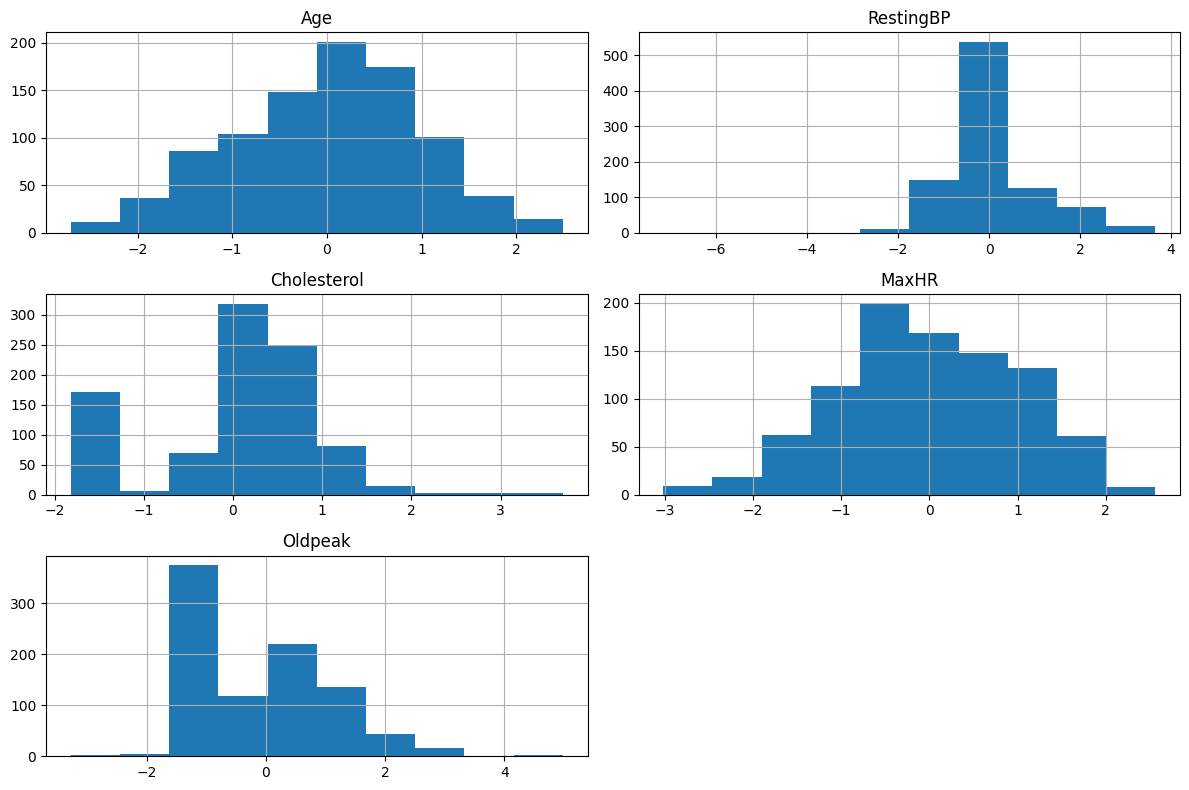

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df_encoded[num_features] = scaler.fit_transform(df_encoded[num_features])


df_encoded[num_features].hist(figsize=(12,8))
plt.tight_layout()
plt.show()

Hasil Pengamatan dari Histogram (Setelah Scaling):

- angka-angka di sumbu horizontal (sumbu x) pada setiap histogram ini akan berbeda dari histogram sebelum scaling. Sekarang, nilai-nilainya akan berkisar di sekitar angka 0.
- Meskipun angka-angkanya berubah, bentuk umum dari sebaran data untuk setiap fitur (apakah miring, atau seperti lonceng) kemungkinan besar akan tetap mirip dengan sebelum di-scale. Yang berubah drastis adalah rentang nilainya.
- Ini menunjukkan bahwa fitur-fitur tersebut sekarang punya skala yang seragam, dengan rata-rata mendekati 0.

# *Splitting Data*

Data akan dibagi menjadi 2 Train dan Test dengan skema 80% training dan 20% testing

In [7]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (734, 15)
Test shape: (184, 15)


# *Training Model*
Saya mengambil model ***LogisticRegression*** dan ***RandomForestClassifier*** dari scikit-learn.

Regresi Logistik: Saya membuat model (logreg), mengatur max_iter=1000 (agar cukup "belajar") dan random_state=42 (untuk hasil konsisten), lalu melatihnya dengan logreg.fit(X_train, y_train).
Random Forest: Saya juga membuat model (rf), mengatur random_state=42, dan melatihnya dengan rf.fit(X_train, y_train).

Tujuan utama melatih (.fit()) adalah agar model menemukan pola dalam data latih untuk bisa membuat prediksi.
Saya memilih dua model berbeda untuk perbandingan:
Regresi Logistik: Model dasar yang sederhana dan cepat.
Random Forest: Model yang lebih canggih dan seringkali lebih akurat.
Setelah dilatih, kedua model ini siap untuk diuji kemampuannya pada data baru.

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# *Parameter Optimization*

Pada tahap ini, saya melakukan optimasi hyperparameter untuk model Random Forest. Tujuannya adalah untuk menemukan kombinasi pengaturan (hyperparameter) yang paling optimal agar model dapat memberikan kinerja prediksi terbaik. Proses ini menggunakan GridSearchCV, yang secara sistematis mencoba berbagai kombinasi pengaturan yang telah saya tentukan.

Dengan melakukan optimasi ini, saya berusaha meningkatkan kemampuan generalisasi model, sehingga model tidak hanya bagus pada data latih tetapi juga akurat ketika digunakan pada data baru, dan terhindar dari masalah seperti underfitting (model terlalu sederhana) atau overfitting (model terlalu kompleks dan hanya hafal data latih). Kinerja setiap kombinasi pengaturan dievaluasi berdasarkan F1-score melalui validasi silang pada data latih


In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train, y_train)
print("Best params:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_

Best params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


In [15]:
from sklearn.model_selection import GridSearchCV


logreg_base = LogisticRegression(random_state=42, max_iter=1000)


param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}


grid_lr = GridSearchCV(estimator=logreg_base,
                       param_grid=param_grid_lr,
                       cv=5,
                       scoring='f1',
                       n_jobs=-1)


grid_lr.fit(X_train, y_train)

print("Parameter terbaik untuk Logistic Regression:", grid_lr.best_params_)

best_logreg = grid_lr.best_estimator_

Parameter terbaik untuk Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

models = {
    'Logistic Regression': logreg,
    'Random Forest': rf,
    'Best Random Forest': best_rf
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()

=== Logistic Regression ===
Accuracy: 0.8858695652173914
Precision: 0.8715596330275229
Recall: 0.9313725490196079
F1 Score: 0.9004739336492891
Confusion Matrix:
 [[68 14]
 [ 7 95]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184


=== Random Forest ===
Accuracy: 0.875
Precision: 0.883495145631068
Recall: 0.8921568627450981
F1 Score: 0.8878048780487805
Confusion Matrix:
 [[70 12]
 [11 91]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86        82
           1       0.88      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184


==

**Kesimpulan Pemilihan Model dan Hasil Akhir Proyek**

Setelah melakukan analisis dan perbandingan kinerja dari semua model yang diuji (Logistic Regression, Random Forest standar, dan Random Forest yang telah dioptimasi) pada data uji, saya memutuskan bahwa **model Logistic Regression adalah solusi akhir yang paling optimal** untuk proyek prediksi penyakit jantung ini.

Ringkasan metrik performa utama dari **model Logistic Regression** pada data uji yang mendukung keputusan ini adalah:
-   Akurasi Keseluruhan: 0.886 (atau 88.59%)
-   Precision (untuk Kelas 1 - Ada Penyakit Jantung): 0.872 (atau 87.16%)
-   **Recall (untuk Kelas 1 - Ada Penyakit Jantung): 0.931 (atau 93.14%)**
-   **F1-score (untuk Kelas 1 - Ada Penyakit Jantung): 0.900 (atau 90.05%)**
-   Jumlah Pasien Sakit yang Terlewat (False Negatives): 7



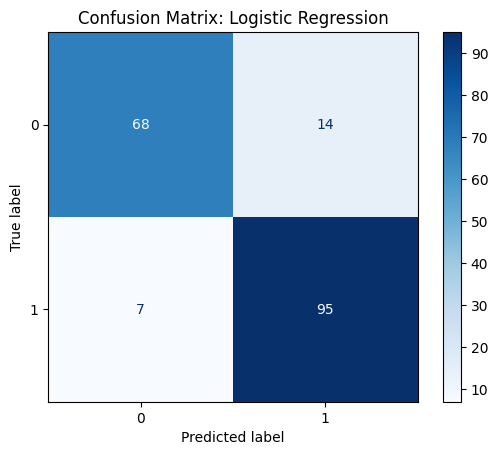

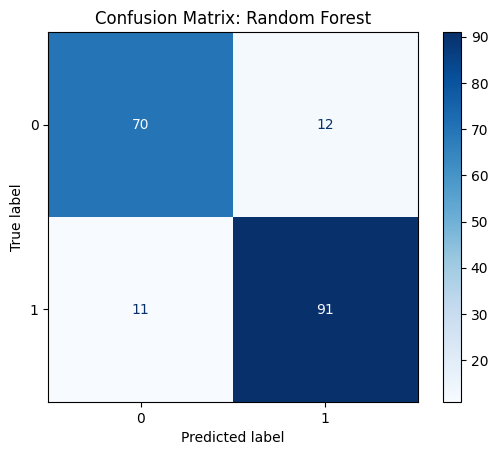

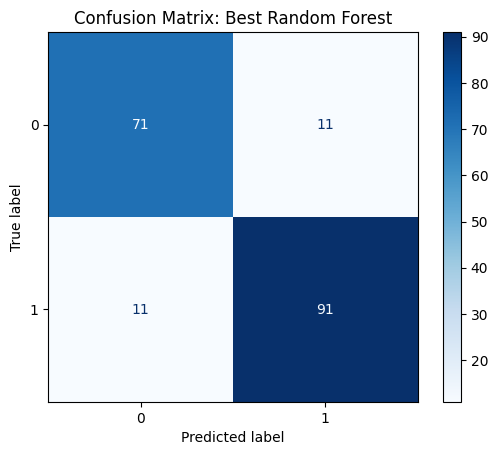

In [11]:
# Confusion matrix heatmap
from sklearn.metrics import ConfusionMatrixDisplay

for name, model in models.items():
    y_pred = model.predict(X_test)
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues', values_format='d')
    disp.ax_.set_title(f'Confusion Matrix: {name}')
    plt.show()

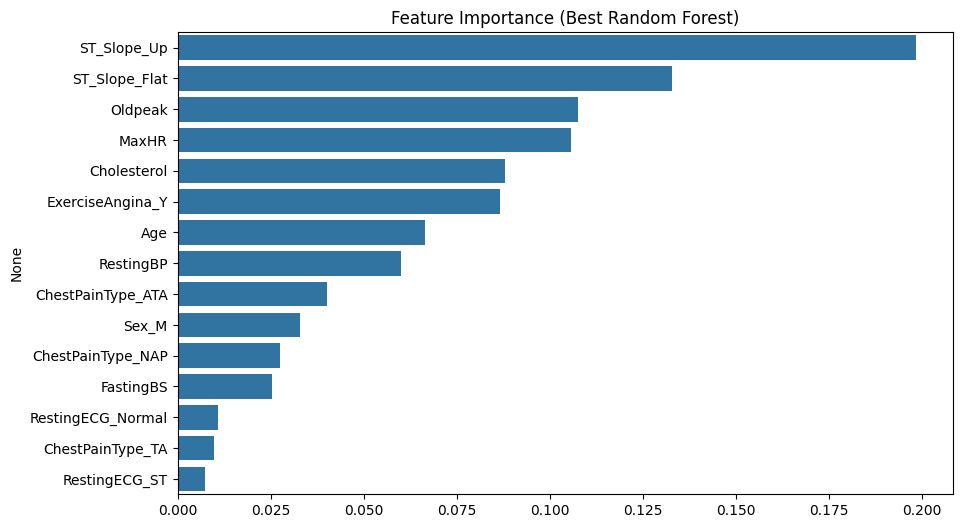

In [12]:
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Feature Importance (Best Random Forest)')
plt.show()

Diagram batang ini menunjukkan fitur-fitur yang digunakan untuk melatih model, diurutkan dari atas ke bawah berdasarkan seberapa besar pengaruhnya menurut model Random Forest terbaik. Batang yang lebih panjang berarti fitur tersebut dianggap lebih penting oleh model.

- Fitur yang paling penting (batang terpanjang di atas) adalah ST_Slope_Up. Ini berarti bagaimana bentuk segmen ST pada hasil EKG saat pasien berolahraga (khususnya jika bentuknya menanjak/'Up') sangat berpengaruh pada prediksi model.
- Fitur-fitur penting berikutnya secara berurutan adalah ST_Slope_Flat (segmen ST datar), Oldpeak (nilai depresi ST), MaxHR (denyut jantung maksimum), Cholesterol (kadar kolesterol), ExerciseAngina_Y (apakah ada nyeri dada saat olahraga), Age (usia), dan seterusnya hingga fitur dengan pengaruh terkecil di bagian bawah.


Kesimpulan:

Model Random Forest terbaik menganggap bahwa karakteristik dari segmen ST pada EKG (terutama ST_Slope_Up dan ST_Slope_Flat) serta nilai Oldpeak adalah faktor-faktor yang paling dominan dalam memprediksi risiko penyakit jantung. Ini memberikan petunjuk bahwa hasil pemeriksaan EKG terkait aktivitas fisik sangat krusial menurut model ini. Fitur lain seperti denyut jantung maksimum, kolesterol, dan adanya nyeri dada saat berolahraga juga memiliki kontribusi yang signifikan.

In [13]:
import joblib


joblib.dump(best_rf, 'best_rf_model.pkl')

joblib.dump(scaler, 'scaler.pkl')

print("Model dan scaler berhasil disimpan.")

Model dan scaler berhasil disimpan.


In [14]:
print("Urutan fitur saat training:", list(X_train.columns))

Urutan fitur saat training: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']


# **Interference**

Pada cell Ini saya melakukan sebuah test prediksi model dengan menggunakan data pasien dummy dan model ini berhasil memprediksi pasien tersebut

In [ ]:
import pandas as pd
import joblib

model = joblib.load('best_rf_model.pkl')
scaler = joblib.load('scaler.pkl')

dummy = pd.read_csv('/content/dummy_patient_inference_fixed.csv')

num_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
dummy[num_features] = scaler.transform(dummy[num_features])

prediksi = model.predict(dummy)
print("Prediksi penyakit jantung pada pasien dummy:", "Ada" if prediksi[0]==1 else "Tidak ada")

Prediksi penyakit jantung pada pasien dummy: Ada
